# Importiing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Reading and knowing the data set

In [3]:
# "timestamp" - timestamp field for grouping the data
# "cnt" - the count of a new bike shares
# "t1" - real temperature in C
# "t2" - temperature in C "feels like"
# "hum" - humidity in percentage
# "wind_speed" - wind speed in km/h
# "weather_code" - category of the weather
# "is_holiday" - boolean field - 1 holiday / 0 non holiday
# "is_weekend" - boolean field - 1 if the day is weekend
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# "weather_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

In [4]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp       17414 non-null object
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

Text(0.5, 1.0, 'correlation of temp and atemp')

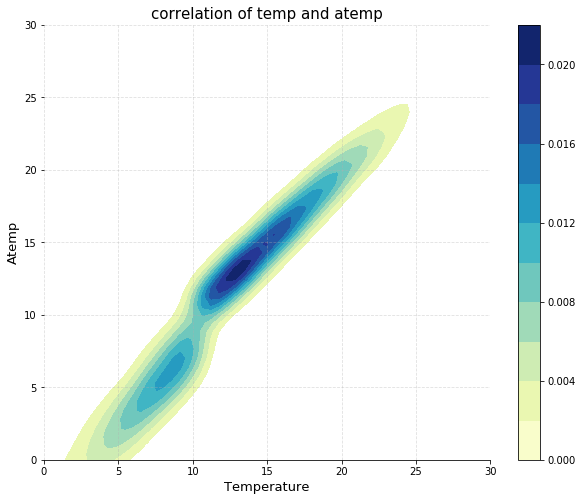

In [22]:
# 温度与体表温度的关系度量
plt.figure(figsize=(10,8))
sns.kdeplot(df['t1'],df['t2'],shade=True,shade_lowest=False,cut=10,cmap='YlGnBu',cbar=True)
sns.despine(left=True)
plt.grid(linestyle='--',alpha=0.4)
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel('Temperature',fontsize=13)
plt.ylabel('Atemp',fontsize=13)
plt.title('correlation of temp and atemp',fontsize=15)

Text(0.5, 1.0, 'correlation of temp and windspeed')

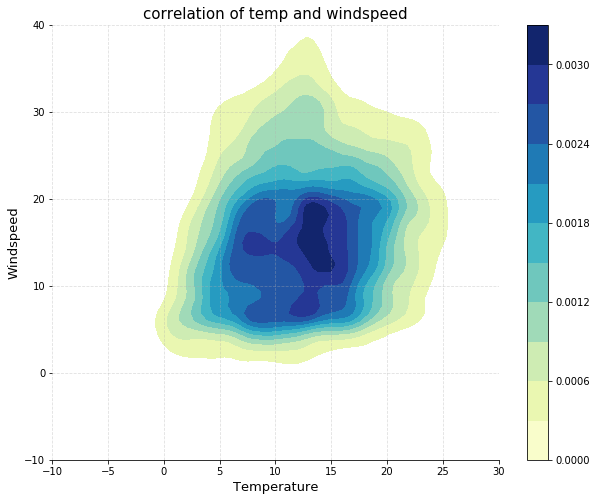

In [28]:
# 温度与风速的关系度量
plt.figure(figsize=(10,8))
sns.kdeplot(df['t1'],df['wind_speed'],shade=True,shade_lowest=False,cut=10,cmap='YlGnBu',cbar=True)
sns.despine(left=True)
plt.grid(linestyle='--',alpha=0.4)
plt.xlim(-10,30)
plt.ylim(-10,40)
plt.xlabel('Temperature',fontsize=13)
plt.ylabel('Windspeed',fontsize=13)
plt.title('correlation of temp and windspeed',fontsize=15)

Text(0.5, 1.0, 'correlation of temp and humidity')

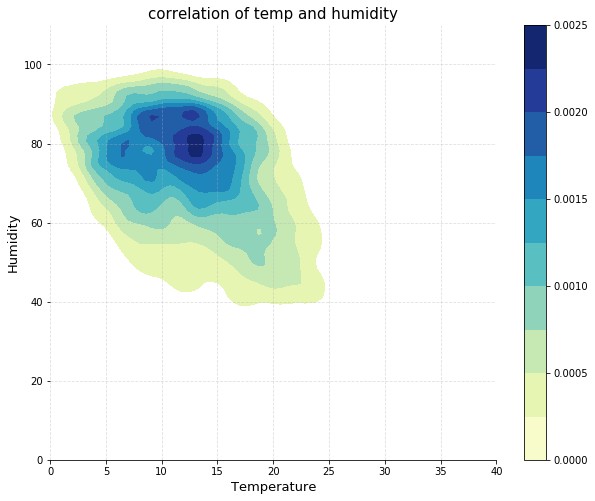

In [25]:
# 温度与湿度的关系度量
plt.figure(figsize=(10,8))
sns.kdeplot(df['t1'],df['hum'],shade=True,shade_lowest=False,cut=10,cmap='YlGnBu',cbar=True)
sns.despine(left=True)
plt.grid(linestyle='--',alpha=0.4)
plt.xlim(0,30)
plt.ylim(0,110)
plt.xlabel('Temperature',fontsize=13)
plt.ylabel('Humidity',fontsize=13)
plt.title('correlation of temp and humidity',fontsize=15)

# EDA

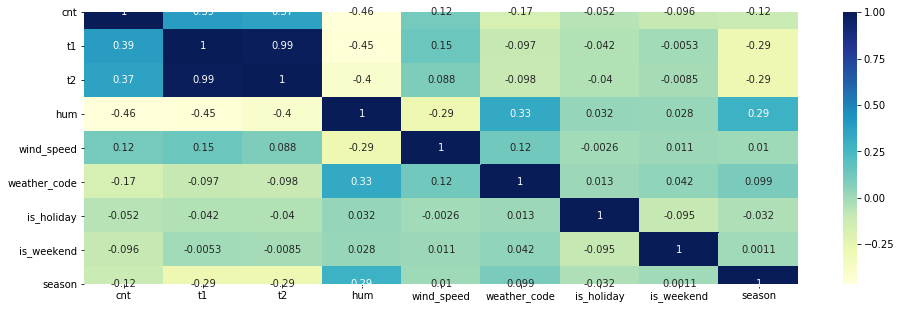

In [8]:
# plot heatmap with numeric features
plt.figure(figsize=(16,5))
sns.heatmap(data=df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [9]:
# Format and make date, hour, weekday name, weekday number, month features

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['weekday_name'] = df['timestamp'].dt.weekday_name
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,hour,weekday_name,weekday,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,0,Sunday,6,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,1,Sunday,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,2,Sunday,6,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,3,Sunday,6,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,4,Sunday,6,1


Text(0.5, 1.0, 'Bikeshares by Time of Day')

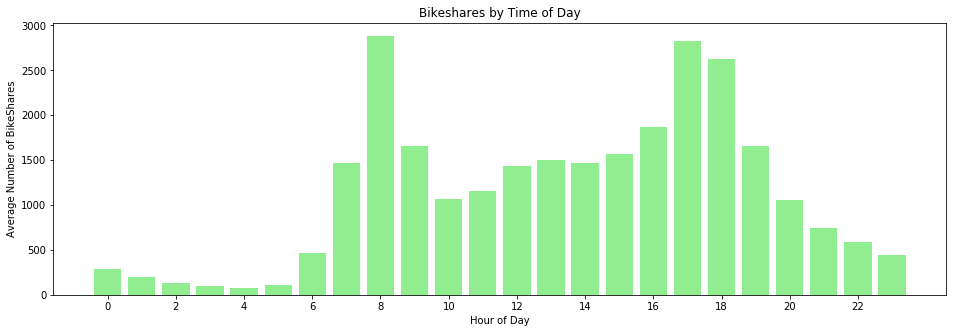

In [11]:
# Bikeshares by Time of Day

data_hour = df.loc[:, ['hour', 'cnt']]
data_hour_mean = data_hour.groupby('hour').mean()['cnt'].round()

# Plot values calculated above
plt.figure(figsize=(16,5))
plt.bar(data_hour_mean.index, data_hour_mean, color='lightgreen')
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of BikeShares")
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
plt.title("Bikeshares by Time of Day")

Text(0.5, 1.0, 'Bikeshares by Day of Week')

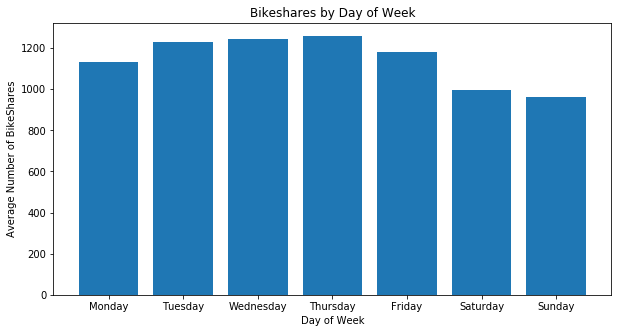

In [12]:
# Bikeshares by Day of Week

data_weekday = df.loc[:, ['weekday_name', 'cnt']]
data_weekday_mean = data_weekday.groupby('weekday_name').mean()['cnt'].round()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_weekday_mean = data_weekday_mean.reindex(index = day_order)

plt.figure(figsize=(10,5))
plt.bar(data_weekday_mean.index, data_weekday_mean)
plt.xlabel("Day of Week")
plt.ylabel("Average Number of BikeShares")
plt.title("Bikeshares by Day of Week")

Text(0.5, 1.0, 'Bikeshares by weekdays')

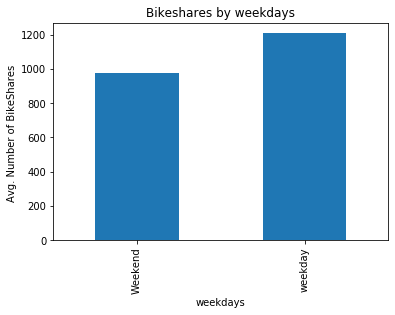

In [13]:
# Plot weekdays vs weekends
# "is_weekend" - boolean field - 1 if the day is weekend

df['is_weekend'] = df['is_weekend'].map({0: "weekday", 1:"Weekend"})

df_weekdays_vs_weekends =df.groupby(['is_weekend']).mean()['cnt']

df_weekdays_vs_weekends.plot(kind='bar')
plt.xlabel("weekdays")
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by weekdays")

Text(0.5, 1.0, 'Bikeshares by holidays')

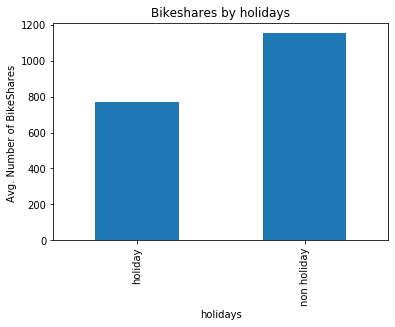

In [14]:
# Plot holidays vs working days
# "is_holiday" - boolean field - 1 holiday / 0 non holiday

df['is_holiday'] = df['is_holiday'].map({0: "non holiday", 1:"holiday"})

df_hoiday =df.groupby(['is_holiday']).mean()['cnt']
df_hoiday.plot(kind='bar')
plt.xlabel("holidays")
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by holidays")

Text(0.5, 1.0, 'Bikeshares by season')

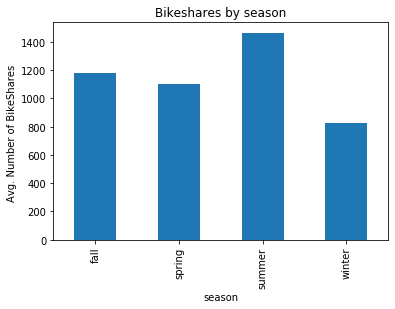

In [15]:
# Plot season vs Avg. Number of BikeShares
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

df['season_new'] = df['season'].map({0:"spring", 1:"summer", 2:"fall", 3:"winter"})

df_season =df.groupby(['season_new']).mean()['cnt']

df_season.plot(kind='bar')
plt.xlabel("season")
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by season")

Text(0.5, 1.0, 'Bikeshares by Date')

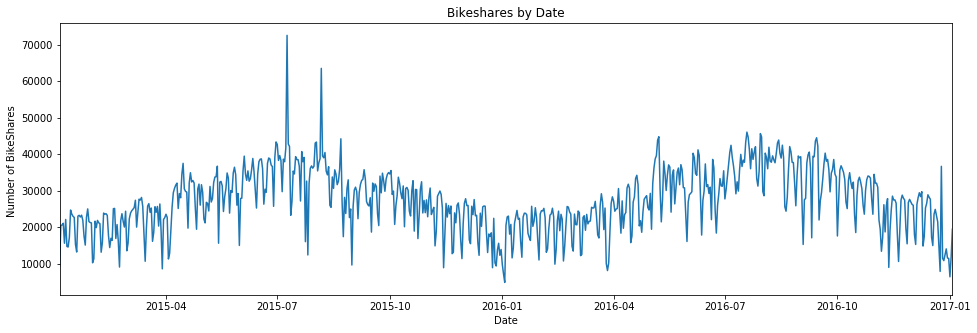

In [16]:
df_date = df.groupby(['date']).sum()['cnt']
plt.figure(figsize=(16,5))
df_date.plot()
plt.xlabel("Date")
plt.ylabel("Number of BikeShares ")
plt.title("Bikeshares by Date")

Text(0.5, 0.98, 'Bikeshares by Month')

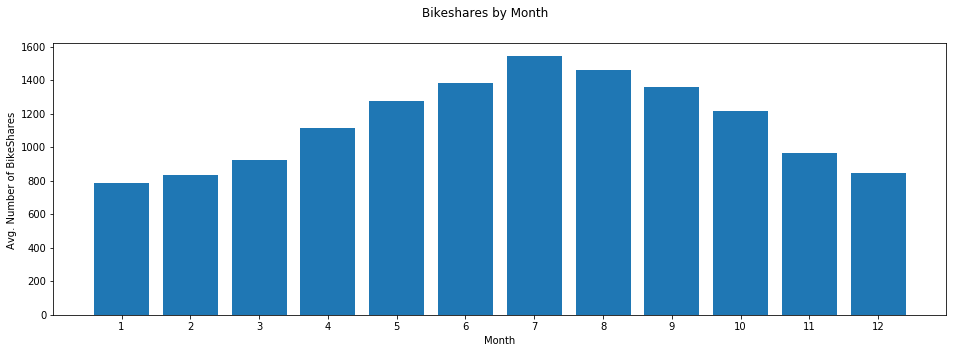

In [17]:
df_month = df.groupby(['month']).mean()['cnt'].round()

plt.figure(figsize=(16,5))
plt.bar(df_month.index, df_month)
plt.xlabel("Month")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.suptitle("Bikeshares by Month")

Text(0.5, 1.0, 'Bikeshares by Weather condition')

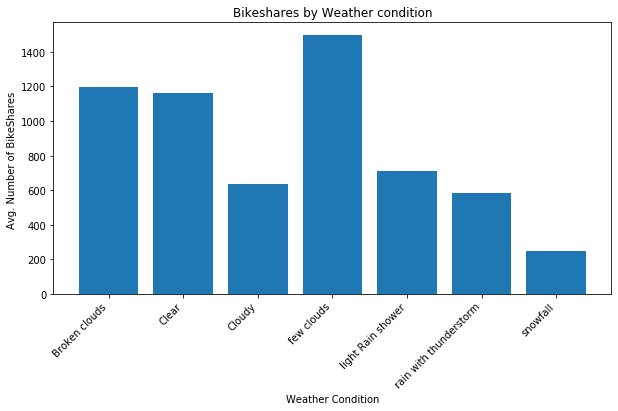

In [18]:
#Bikeshares by Weather condition

# "weather_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

df['weather_code'] = df['weather_code'].map({1:"Clear", 2:"few clouds", 3:"Broken clouds", 4:"Cloudy", 
                                             7:"light Rain shower", 10:"rain with thunderstorm", 26:"snowfall", 94:"Freezing Fog"})

df_weather = df.groupby(['weather_code']).mean()['cnt'].round()

plt.figure(figsize=(10,5))
plt.bar(df_weather.index, df_weather)
plt.xlabel("Weather Condition")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(rotation=45,ha='right')
plt.title("Bikeshares by Weather condition")

Text(0.5, 1, 'Bikeshares by weekday and day hours')

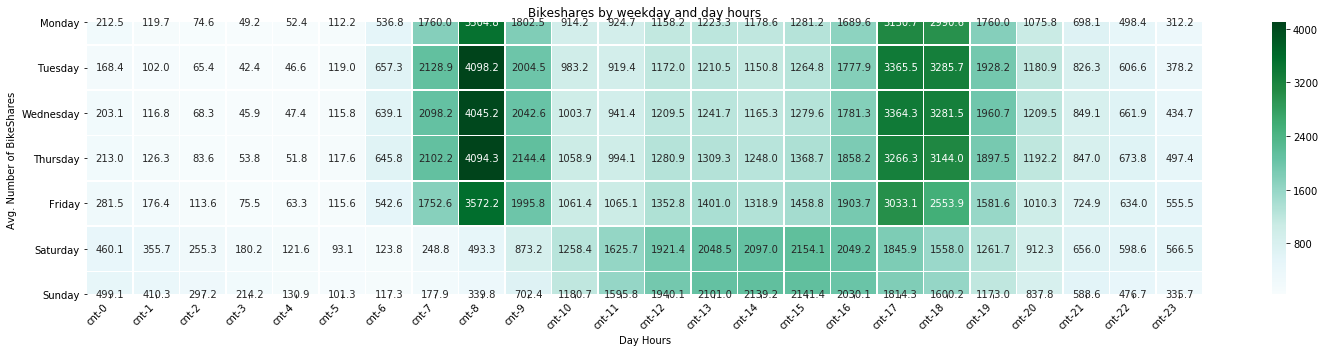

In [19]:
#Bikeshares by weekday and day hours

df_day_vs_hour = df.loc[:,['weekday_name','hour','cnt']]
df_day_vs_hour_mean = pd.pivot_table(df_day_vs_hour,index=["weekday_name"],values=["cnt"], columns=["hour"])

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_vs_hour_mean = df_day_vs_hour_mean.reindex(index = day_order)

plt.figure(figsize=(25,5))
g = sns.heatmap(data=df_day_vs_hour_mean, cmap="BuGn", annot=True, linewidths=.5, fmt=".1f" )
plt.xlabel("Day Hours")
plt.ylabel("Avg. Number of BikeShares ")
plt.xticks(rotation=45,ha='right')
plt.title("Bikeshares by weekday and day hours")

Text(0.5, 1, 'Bikeshares by Season and day of week')

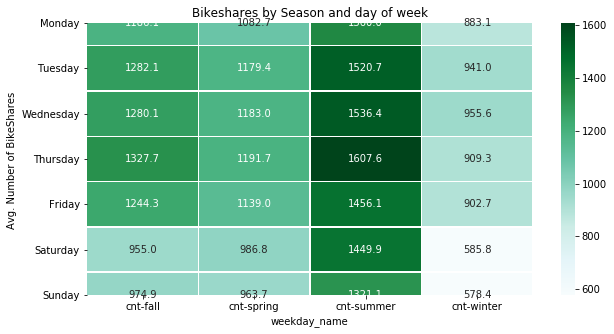

In [20]:
# Plot season vs day of week
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

df_season_vs_hour = df.loc[:,['season','weekday_name','cnt']]

df_season_vs_hour["season"] = df_season_vs_hour["season"].map({0: "spring", 1: "summer", 2: "fall",3: "winter"})

df_season_vs_hour_mean = pd.pivot_table(df_season_vs_hour,index=["weekday_name"],values=["cnt"], columns=["season"], aggfunc="mean")

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_season_vs_hour_mean = df_season_vs_hour_mean.reindex(index = day_order)

plt.figure(figsize=(10,5))
g = sns.heatmap(data=df_season_vs_hour_mean, cmap="BuGn", linewidths=.5, annot=True, fmt=".1f" )
plt.xlabel("weekday_name")
plt.ylabel("Avg. Number of BikeShares ")
plt.title("Bikeshares by Season and day of week")